In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("US_Accidents_June20.csv")

In [3]:
def reduce_mem(df): #Thanks to KEREM ÜRKMEZ
    starttime = time.time()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if pd.isnull(c_min) or pd.isnull(c_max):
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('-- Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction),time spend:{:2.2f} min'.format(end_mem,
                                                                                                           100*(start_mem-end_mem)/start_mem,
                                                                                                           (time.time()-starttime)/60))
    return df

In [4]:
df = reduce_mem(df)

-- Mem. usage decreased to 710.38 Mb (29.6% reduction),time spend:0.02 min


In [5]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

ÖNEMLİ

ENDLAT, ENDLNG, Number, WindChill, Precipitation çok fazla null data var direkt drop işlemi uygulanabilir.

Veri açıklamalarına göre çok da fazla bir önemleri yok.
https://smoosavi.org/datasets/us_accidents

In [6]:
df.drop(["End_Lat", "End_Lng", "Number", "Wind_Chill(F)", "Precipitation(in)"], axis=1,inplace=True)

Açıklamalarına bakarak elenecek olanlar:

Street, City, County, Statte, Zipcode, Country, Airport_Code, Wind_Dİrection, Amenity, Nautical_Twilight, Astronomical_Twilight

In [7]:
df.drop(["Street", "City", "County", "State", "Zipcode", "Country", "Airport_Code", "Wind_Direction", "Amenity", "Civil_Twilight", "Nautical_Twilight","Astronomical_Twilight"], axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Source             object 
 2   TMC                float16
 3   Severity           int8   
 4   Start_Time         object 
 5   End_Time           object 
 6   Start_Lat          float16
 7   Start_Lng          float16
 8   Distance(mi)       float16
 9   Description        object 
 10  Side               object 
 11  Timezone           object 
 12  Weather_Timestamp  object 
 13  Temperature(F)     float16
 14  Humidity(%)        float16
 15  Pressure(in)       float16
 16  Visibility(mi)     float16
 17  Wind_Speed(mph)    float16
 18  Weather_Condition  object 
 19  Bump               bool   
 20  Crossing           bool   
 21  Give_Way           bool   
 22  Junction           bool   
 23  No_Exit            bool   
 24  Railway            bool   
 25  Roundabout        

In [9]:
def null_percent(df):
    df_size = len(df)
    for i in df:
        print(i, " ----->  ", df[i].isna().sum()/df_size*100)
        
def current_mem_use(df):
    return "Current memory usage is: " + str(round(df.memory_usage().sum() / 1024**2,2)) + " MB."

In [10]:
null_percent(df)

ID  ----->   0.0
Source  ----->   0.0
TMC  ----->   29.451104090172603
Severity  ----->   0.0
Start_Time  ----->   0.0
End_Time  ----->   0.0
Start_Lat  ----->   0.0
Start_Lng  ----->   0.0
Distance(mi)  ----->   0.0
Description  ----->   2.8460700184453798e-05
Side  ----->   0.0
Timezone  ----->   0.11042751671568073
Weather_Timestamp  ----->   1.2330029140910919
Temperature(F)  ----->   1.870778744524517
Humidity(%)  ----->   1.983340813754032
Pressure(in)  ----->   1.590440847707647
Visibility(mi)  ----->   2.1589148731919274
Wind_Speed(mph)  ----->   12.938490450154358
Weather_Condition  ----->   2.166940790643943
Bump  ----->   0.0
Crossing  ----->   0.0
Give_Way  ----->   0.0
Junction  ----->   0.0
No_Exit  ----->   0.0
Railway  ----->   0.0
Roundabout  ----->   0.0
Station  ----->   0.0
Stop  ----->   0.0
Traffic_Calming  ----->   0.0
Traffic_Signal  ----->   0.0
Turning_Loop  ----->   0.0
Sunrise_Sunset  ----->   0.0032729805212121862


In [11]:
current_mem_use(df)

'Current memory usage is: 371.94 MB.'

In [12]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")

In [13]:
dataframeInformations(df)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
19,Bump,3513617,0,0.00,bool,"[False, True]",2
20,Crossing,3513617,0,0.00,bool,"[False, True]",2
9,Description,3513617,1,0.00,object,[Right lane blocked due to accident on I-70 Ea...,1780093
8,Distance(mi),3513617,0,0.00,float16,"[0.01, 0.0, 1.32, 1.09, 1.28, 0.48, 1.67, 0.94...",6290
5,End_Time,3513617,0,0.00,object,"[2016-02-08 11:00:00, 2016-02-08 06:37:59, 201...",3246120
21,Give_Way,3513617,0,0.00,bool,"[False, True]",2
14,Humidity(%),3513617,69687,1.98,float16,"[91.0, 100.0, 96.0, 89.0, 97.0, 99.0, 93.0, 76...",101
0,ID,3513617,0,0.00,object,"[A-1, A-2, A-3, A-4, A-5, A-6, A-7, A-8, A-9, ...",3513617
22,Junction,3513617,0,0.00,bool,"[False, True]",2
23,No_Exit,3513617,0,0.00,bool,"[False, True]",2


100%|████████████████████████████████████████████████████████████████████████| 29174/29174 [00:00<00:00, 292444.49it/s]


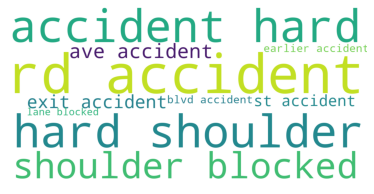

100%|██████████████████████████████████████████████████████████████████████| 2373210/2373210 [25:32<00:00, 1548.36it/s]


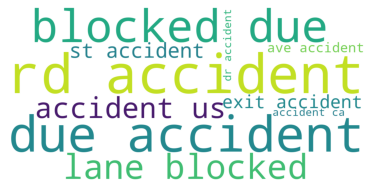

100%|█████████████████████████████████████████████████████████████████████████| 998913/998913 [40:21<00:00, 412.52it/s]


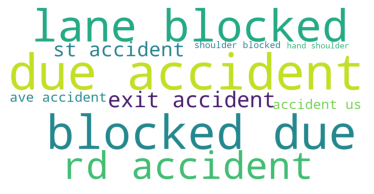

100%|█████████████████████████████████████████████████████████████████████████| 112320/112320 [04:54<00:00, 381.66it/s]


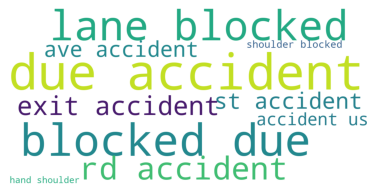

In [14]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from tqdm import tqdm

comment_words = '' 
stopwords = set(STOPWORDS) 

for i in range(1,5):
    for val in tqdm(df[df['Severity']==i].Description): 

        val = str(val) 

        tokens = val.split() 

        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width=400,height=200,random_state=101, max_font_size=450,
                 min_font_size=1,stopwords=stopwords,background_color="white",
                 scale=3,max_words=10,collocations=True).generate(comment_words) 
                       
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()